# 第4章　深度估计和分割

## 基于普通摄像头的深度估计

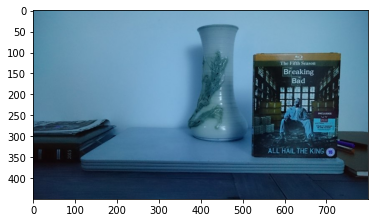

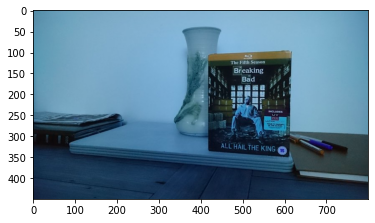

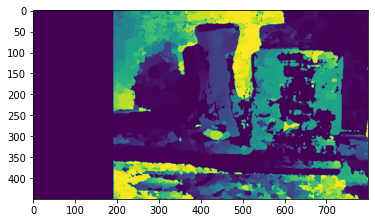

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

minDisparity = 16
numDisparities = 192 - minDisparity
blockSize = 15
uniquenessRadio = 1
speckleWindowSize = 3
speckleRange = 3
disp12MaxDiff = 200
P1 = 600
P2 = 2400

storeo = cv2.StereoSGBM_create(
    minDisparity=minDisparity,
    numDisparities= numDisparities,
    blockSize=blockSize,
    uniquenessRatio=uniquenessRadio,
    speckleRange=speckleRange,
    speckleWindowSize=speckleWindowSize,
    disp12MaxDiff=disp12MaxDiff,
    P1=P1,
    P2=P2
)

imgL = cv2.imread("images/color1_small.jpg")
imgR = cv2.imread("images/color2_small.jpg")


disparity = storeo.compute(imgL,imgR).astype(np.float32) / 16.0
plt.imshow(imgL)
plt.show()
plt.imshow(imgR)
plt.show()
disImg = (disparity-minDisparity)/numDisparities
plt.imshow(disImg)
plt.show()

# 基于GrabCut算法的前景检测

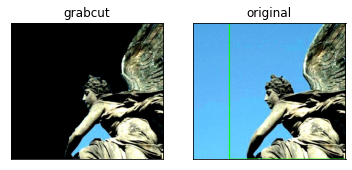

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

original = cv2.imread('images/statue_small.jpg')
img = original.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,1,421,378)
cv2.grabCut(img, mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
cv2.rectangle(original, rect,(0,255,0),2)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("grabcut")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([])
plt.yticks([])
plt.show()

## 基于分水岭算法的图像分割

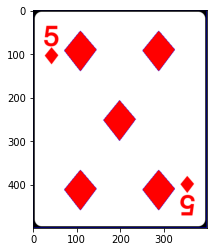

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/5_of_diamonds.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = sure_fg.astype(np.uint8)
unknow = cv2.subtract(sure_bg,sure_fg)
ret,markers = cv2.connectedComponents(sure_fg)
markers+=1
markers[unknow==255] = 0
markers = cv2.watershed(img,markers)
img[markers==-1] = [255,0,0]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()